Model Trained with 10000 images

In [ ]:
#1000 images
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
s=open('/content/drive/My Drive/Main/train.mn.txt')

In [ ]:
s=open("/content/drive/My Drive/Multi/train.mn.txt")

In [ ]:
with open('/content/drive/My Drive/Main/train.mn.txt') as f:
    train_ml = f.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as f:
    train_l = f.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as f:
    train_img_name = f.read().split('\n')
train_ml.pop()
train_ml.pop()
train_en.pop()
train_en.pop()
train_img_name.pop()
print(len(train_ml))
print(len(train_en))
print(len(train_img_name))
img_path=[]
for s in train_img_name:
    img_path.append("/content/drive/My Drive/Main/trainimages/train/"+s)

28930
28931
28931


In [ ]:
train_img_name[0]

'10.jpg'

In [ ]:
train_en[1]

'it is an indoor scene\t\t\t\t\t\t'

/content/drive/My Drive/Main/trainimages/train/11.jpg
de:ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
en:it is an indoor scene						


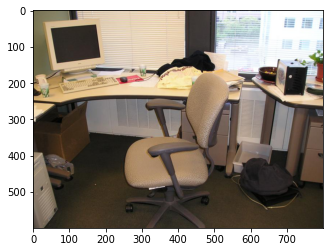

In [ ]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("ml:"+train_ml[1])
print("en:"+train_en[1])

/content/drive/My Drive/Main/trainimages/train/10.jpg
de:ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
en:Male surfer surfing in still in the ocean


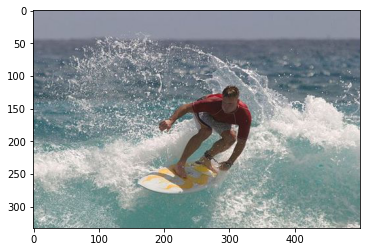

In [ ]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("ml:"+train_ml[0])
print("en:"+train_en[0])

In [ ]:
choicenum=1000
train_de=train_de[:choicenum]
train_en=train_en[:choicenum]

In [ ]:
de_df = pd.DataFrame(train_ml, columns=['ml']) 
en_df = pd.DataFrame(train_en, columns=['en']) 
import re
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    #text=' '.join(text.split())
    return text

text1 = en_df["en"].apply(clean_text)
text2 = ml_df["ml"].apply(clean_text)
text1 = list(text1.values)
text2 = list(text2.values)

In [ ]:
text1[1]

'it is an indoor scene'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


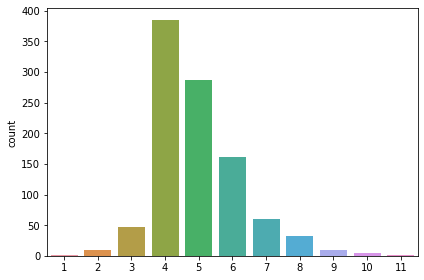

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


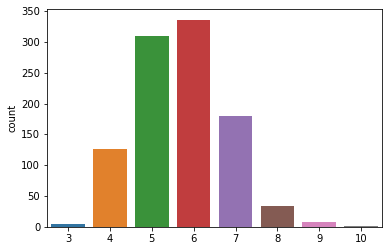

In [ ]:
texttemp=[]
for s in text2:
    temp="cls "+s+" eos"
    texttemp.append(temp)
text2=[]
text2=texttemp
from sklearn.model_selection import train_test_split
english_words = []
french_words = []

for i in text1:
    english_words.append(len(i.split()))

for j in text2:
    malayalm_words.append(len(j.split()))
import seaborn as sn
import matplotlib.pyplot as plt

sn.countplot(english_words)
#et_xlabel( "GFG X")
plt.tight_layout()
plt.show()

sn.countplot(french_words)
plt.show()

In [ ]:
text2[1]

'cls ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos'

In [ ]:
max_len_english = max(english_words)
max_len_malayalam = max(malayalam_words)

#from sklearn.model_selection import train_test_split
#x_tr,x_val,y_tr,y_val=train_test_split(text1,text2,test_size=0.3,random_state=12,shuffle=True)
#print(len(x_tr))
#print(len(x_val))
x_tr=text1[:choicenum-500]
y_tr=text2[:choicenum-500]
x_val=text1[choicenum-500:]
y_val=text2[choicenum-500:]

In [ ]:
len(x_tr)

2000

In [ ]:
x_tr[1]

'it is an indoor scene'

In [ ]:
len(text2)

1013

In [ ]:
print(choicenum)

2000


In [ ]:
a=text1[choicenum-500:]
a

[]

In [ ]:
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)

x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)

from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = max_len_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = max_len_english,padding = 'post')

# +1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1

# y data
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)

y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)

from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = max_len_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = max_len_malayalam,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1

In [ ]:
print("The document count",x_tokens.word_counts)

The document count OrderedDict([('male', 1), ('surfer', 1), ('surfing', 1), ('in', 75), ('still', 1), ('the', 191), ('ocean', 2), ('it', 2), ('is', 57), ('an', 8), ('indoor', 1), ('scene', 1), ('computer', 7), ('screens', 1), ('turned', 3), ('on', 164), ('man', 37), ('has', 9), ('short', 3), ('hair', 7), ('photo', 2), ('album', 1), ('open', 2), ('adults', 1), ('lap', 1), ('there', 3), ('a', 179), ('group', 5), ('of', 61), ('girls', 1), ('beside', 3), ('black', 45), ('car', 42), ('child', 4), ('stroller', 1), ('tall', 6), ('metal', 6), ('lightpost', 1), ('wall', 21), ('painted', 3), ('white', 51), ('are', 5), ('several', 1), ('pictures', 1), ('woman', 16), ('facing', 1), ('this', 7), ('office', 3), ('layout', 1), ('four', 4), ('metallic', 1), ('chairs', 2), ('clutter', 1), ('table', 12), ('microwave', 4), ('oven', 3), ('suv', 5), ('driving', 6), ('through', 2), ('intersection', 2), ('person', 16), ('crossing', 4), ('street', 27), ('with', 26), ('umbrella', 2), ('gray', 6), ('pants', 3),

In [ ]:
print("The document count",x_tokens.word_docs)

The document count defaultdict(<class 'int'>, {'the': 174, 'ocean': 2, 'in': 74, 'surfer': 1, 'male': 1, 'still': 1, 'surfing': 1, 'is': 57, 'scene': 1, 'it': 2, 'indoor': 1, 'an': 8, 'turned': 3, 'on': 164, 'screens': 1, 'computer': 7, 'hair': 7, 'has': 9, 'short': 3, 'man': 37, 'open': 2, 'album': 1, 'lap': 1, 'photo': 2, 'adults': 1, 'girls': 1, 'a': 155, 'beside': 3, 'group': 5, 'car': 42, 'black': 45, 'of': 61, 'there': 3, 'stroller': 1, 'child': 4, 'tall': 6, 'metal': 6, 'lightpost': 1, 'wall': 20, 'painted': 3, 'white': 51, 'are': 5, 'several': 1, 'pictures': 1, 'facing': 1, 'woman': 16, 'office': 3, 'this': 7, 'layout': 1, 'metallic': 1, 'chairs': 2, 'four': 4, 'table': 11, 'clutter': 1, 'oven': 3, 'microwave': 4, 'suv': 5, 'intersection': 2, 'through': 2, 'driving': 6, 'with': 26, 'crossing': 4, 'street': 27, 'person': 16, 'umbrella': 2, 'building': 41, 'gray': 6, 'leaning': 2, 'pants': 3, 'window': 41, 'between': 1, 'standing': 14, 'cars': 3, 'hanging': 7, 'painting': 3, 'cha

In [ ]:
print("The document count",x_tokens.document_count)

The document count 500


In [ ]:
print("The document count",x_tokens.word_index)

The document count {'the': 1, 'a': 2, 'on': 3, 'in': 4, 'of': 5, 'is': 6, 'white': 7, 'black': 8, 'car': 9, 'window': 10, 'building': 11, 'man': 12, 'street': 13, 'with': 14, 'parked': 15, 'blue': 16, 'wall': 17, 'red': 18, 'brown': 19, 'and': 20, 'yellow': 21, 'light': 22, 'road': 23, 'sidewalk': 24, 'to': 25, 'woman': 26, 'person': 27, 'chair': 28, 'standing': 29, 'desk': 30, 'water': 31, 'green': 32, 'tree': 33, 'silver': 34, 'table': 35, 'wearing': 36, 'large': 37, 'sign': 38, 'wooden': 39, 'walking': 40, 'shirt': 41, 'has': 42, 'front': 43, 'room': 44, 'side': 45, 'grey': 46, 'sitting': 47, 'an': 48, 'boat': 49, 'at': 50, 'top': 51, 'computer': 52, 'hair': 53, 'this': 54, 'hanging': 55, 'small': 56, 'ceiling': 57, 'monitor': 58, 'truck': 59, 'next': 60, 'people': 61, 'sky': 62, 'tall': 63, 'metal': 64, 'driving': 65, 'gray': 66, 'brick': 67, 'pool': 68, 'group': 69, 'are': 70, 'suv': 71, 'lamp': 72, 'plate': 73, 'door': 74, 'orange': 75, 'pole': 76, 'cup': 77, 'two': 78, 'picture'

In [ ]:
y_voc_size

3530

In [ ]:
print("The sequences generated from text are : ",x_tr[1])

The sequences generated from text are :  [157   6  48 231 232   0   0   0   0   0   0]


In [ ]:
len(x_tr)

500

In [ ]:
pip install keras-applications

     |████████████████████████████████| 50 kB 2.6 MB/s 


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
modelvgg = VGG16(include_top=True,weights="imagenet")
## load the locally saved weights 
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
import cv2
import cv

ERROR:root:Error disabling cv.imshow().
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_import_hooks/_cv2.py", line 86, in load_module
    cv_module.imshow,
AttributeError: module 'cv' has no attribute 'imshow'


In [ ]:
pip install cv

In [ ]:
imagedata=np.zeros(shape=(choicenum,224,224,3))
for i in range(choicenum):
    temp=mp.imread(img_path[i])
    if (len(temp.shape)==3):
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
    elif (len(temp.shape)<3):
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
    #print(temp)
    
    
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:choicenum]

images = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images[name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Main/trainimages/train/10.jpg
200 /content/drive/My Drive/Main/trainimages/train/739.jpg
400 /content/drive/My Drive/Main/trainimages/train/1529.jpg
600 /content/drive/My Drive/Main/trainimages/train/2238.jpg
800 /content/drive/My Drive/Main/trainimages/train/2970.jpg


In [ ]:
vgg_imfea=np.zeros(shape=(len(jpgs),4096))
for i in range(len(jpgs)):
    vgg_imfea[i]=images[jpgs[i]]

In [ ]:
train_vggf=vgg_imfea[:choicenum-500]
val_vggf=vgg_imfea[choicenum-500:]

In [ ]:
#g_1=GlobalAveragePooling2D()(conv_3)
img_inputs=Input(shape=(4096,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(max_len_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
repeat_vector (RepeatVector) (None, 11, 512)           0         
Total params: 2,097,664
Trainable params: 2,097,664
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_voc=x_voc_size
y_voc=y_voc_size

# img_inputs=Input(shape=(224,224,3))
# conv_1=Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='valid')(img_inputs)
# m_pool=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(conv_1)
# bn_1=BatchNormalization()(m_pool)
# conv_2=Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='valid')(bn_1)
# conv_2=Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='valid')(conv_2)
# m_pool1=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(conv_2)
# conv_3=Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='valid')(m_pool1)
# conv_3=Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='valid')(conv_3)
# m_pool2=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(conv_3)
# bn_2=BatchNormalization()(m_pool2)
# conv_3=Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='valid')(bn_2)
# conv_3=Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='valid')(conv_3)
# g_1=GlobalAveragePooling2D()(conv_3)
# d_1=Dense(512, activation='relu')(g_1)
# r_1=RepeatVector(max_len_english)(d_1)
# vf_model = Model(img_inputs, r_1)
#vf_model.summary()


latent_dim = 512
embedding_dim=512

# Encoder
encoder_inputs = Input(shape=(max_len_english,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_output2=Concatenate(axis=-1)([encoder_output2,r_1])

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
#model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model = Model([encoder_inputs,decoder_inputs,img_inputs], decoder_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 11)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 11, 512)      294400      input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 11, 512), (N 2099200     embedding[0][0]                  
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history=model.fit([x_tr,y_tr[:,:-1],train_vggf], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1],val_vggf], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512)

Epoch 1/100
19/19 [==============================] - 14s 314ms/step - loss: 4.0959 - val_loss: 2.3375
Epoch 2/100
19/19 [==============================] - 5s 254ms/step - loss: 2.5005 - val_loss: 2.1182
Epoch 3/100
19/19 [==============================] - 5s 256ms/step - loss: 2.3060 - val_loss: 2.0124
Epoch 4/100
19/19 [==============================] - 5s 262ms/step - loss: 2.1863 - val_loss: 1.9269
Epoch 5/100
19/19 [==============================] - 5s 255ms/step - loss: 2.1131 - val_loss: 1.8843
Epoch 6/100
19/19 [==============================] - 5s 264ms/step - loss: 2.0635 - val_loss: 1.8592
Epoch 7/100
19/19 [==============================] - 5s 254ms/step - loss: 2.0152 - val_loss: 1.8289
Epoch 8/100
19/19 [==============================] - 5s 258ms/step - loss: 1.9631 - val_loss: 1.8004
Epoch 9/100
19/19 [==============================] - 5s 256ms/step - loss: 1.9116 - val_loss: 1.7696
Epoch 10/100
19/19 [==============================] - 5s 256ms/step - loss: 1.8635 - val_l

In [ ]:
reverse_target_word_index=y_tokens.index_word
reverse_source_word_index=x_tokens.index_word
target_word_index=y_tokens.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs, state_h, state_c])
encoder_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 14, 512)      1551872     input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 14, 512), (N 2099200     embedding[0][0]                  
____________________________________________________________________________________________

In [ ]:

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_english,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 512)    2905088     input_4[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 512)]        0                                            
____________________________________________________________________________________________

In [ ]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict([input_seq,img])
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['cls']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (max_len_french -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['cls']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

for i in range(5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),train_vggf[i]))
    print("\n")

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  സമുദ്രത്തിലെ നല്ല തിരകൾ


Review: it is an indoor scene 
Original summary: ഇത് ഒരു ഇൻഡോർ രംഗമാണ് 
Predicted summary:  ഇതൊരു കുളിമുറിയാണ്


Review: computer screens turned on 
Original summary: കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി 
Predicted summary:  ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ


Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  മനുഷ്യന് ചെറിയ മുടിയുണ്ട്


Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു




Review: photo album open on an adults lap 
Predicted summary:  ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു


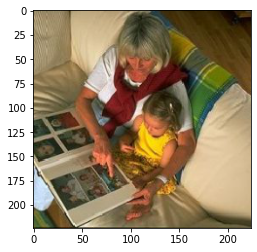

In [ ]:
i=4
print("Review:",seq2text(x_tr[i]))
#print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),vgg_imfea[i]))
plt.imshow(imagedata[i].astype(np.float32))

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  സമുദ്രത്തിലെ നല്ല തിരകൾ


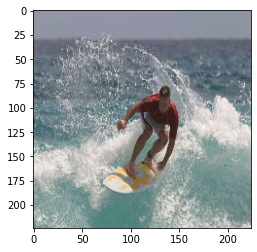

In [ ]:
i=0
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),vgg_imfea[i]))
plt.imshow(imagedata[i].astype(np.float32))

In [ ]:
!pip install sacrebleu
import sacrebleu
import random

In [ ]:
temp_o=[]
temp_p=[]
for i in range(50):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,max_len_english),train_vggf[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

44.835907663936744


In [ ]:
temp_o=[]
temp_p=[]
for i in range(10000):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,max_len_english),train_vggf[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

44.08897167055731


In [ ]:
temp_o=[]
temp_p=[]
for i in range(100):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,max_len_english),vgg_imfea[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

34.843988395192
